<a href="https://colab.research.google.com/github/nathaliacastelobranco/computer_vision/blob/main/02_OCR_com_Python_e_Tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OCR com Python e Tesseract**

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [11]:
!tesseract --list-langs

# OSD -> orientação do texto

List of available languages (2):
eng
osd


In [12]:
# Pacote do Tesseract para Português
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 856 kB of archives.
After this operation, 1,998 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-por all 1:4.00~git30-7274cfa-1.1 [856 kB]
Fetched 856 kB in 0s (5,943 kB/s)
Selecting previously unselected package tesseract-ocr-por.
(Reading database ... 126675 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-por_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...


In [13]:
!tesseract --list-langs

List of available languages (3):
eng
osd
por


### Bibliotecas

In [43]:
import re
import numpy as np
from google.colab.patches import cv2_imshow

from PIL import Image, ImageFont, ImageDraw
import cv2
import matplotlib.pyplot as plt

import pytesseract
from pytesseract import Output


### Teste 01

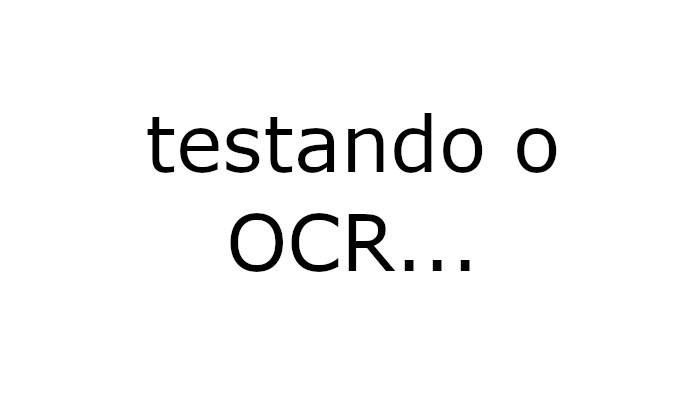

In [6]:
img = cv2.imread('/content/teste01.jpg')

# Conversão do canal BGR para RGB
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2_imshow(rgb)

In [7]:
texto = pytesseract.image_to_string(rgb)
print(texto)

testando o
OCR...



### Teste 02

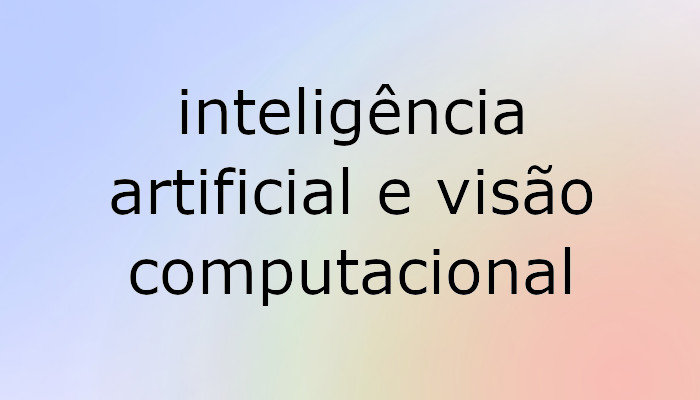

In [8]:
img = cv2.imread('/content/teste02.jpg')
cv2_imshow(img)

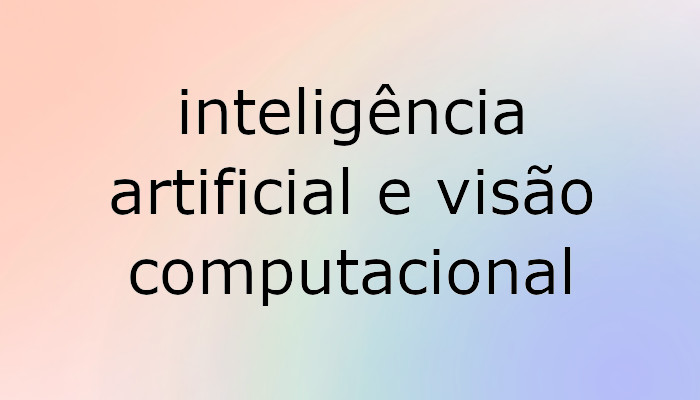

In [9]:
# Conversão do canal BGR para RGB
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2_imshow(rgb)

In [16]:
texto = pytesseract.image_to_string(rgb, lang='por')
print(texto)

inteligência
artificial e visão
computacional



### Suporte a outros idiomas - tessdata

In [19]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

mkdir: cannot create directory ‘tessdata’: File exists
--2025-10-15 23:48:39--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata [following]
--2025-10-15 23:48:39--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata [following]
--2025-10-15 23:48:39--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubus

In [18]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

inteligência
artificial e visão
computacional



## Parâmetros

### Page segmentation mode (PSM)

In [20]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


### Teste 03

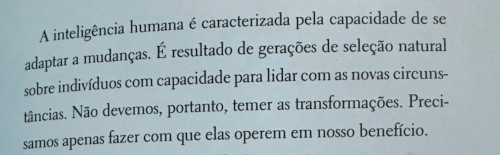

In [21]:
img = cv2.imread('trecho-livro.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [22]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



### Teste 04

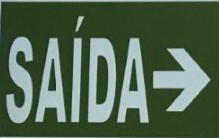

In [23]:
img = cv2.imread('saida.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [24]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(texto)

SAÍDA>



### OSD - Detecção de orientação da página

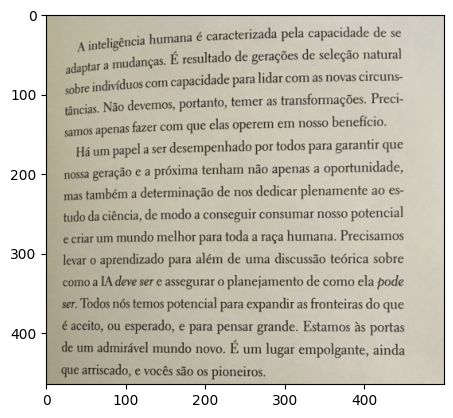

In [26]:
img = Image.open('livro01.jpg')
plt.imshow(img);

In [27]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.66
Script: Latin
Script confidence: 13.33



## Seleção do texto

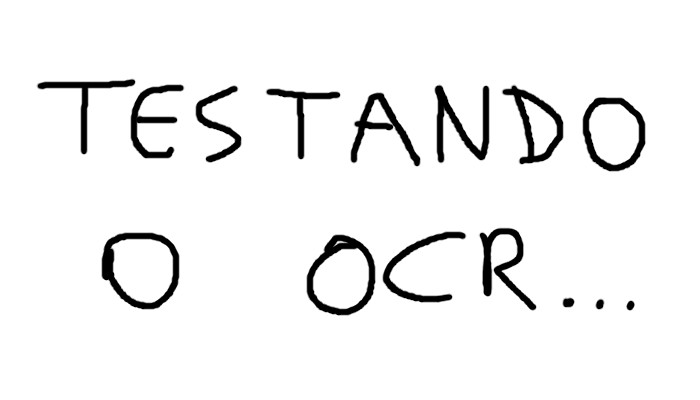

In [29]:
img = cv2.imread('teste_manuscrito_01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

**Pytesseract Image to Data**

- block_num = Número do bloco atual. Quando o tesseract faz o OCR, ele divide a imagem em várias regiões, o que pode variar de acordo com os parametros do PSM e também outros critérios próprios do algoritmo. Cada bloco é uma região

- conf = confiança da predição (de 0 a 100. -1 significa que não foi reconhecido texto)

- height = altura do bloco de texto detectada (ou seja, da caixa delimitadora)

- left = coordenada x onde inicia a caixa delimitadora

- level = o level (nível) corresponde à categoria do bloco detectado. são 5 valores possiveis:
  1. página
  2. bloco
  3. parágrafo
  4. linha
  5. palavra

Portanto, se foi retornado o valor 5 significa que o bloco detectado é texto, se foi 4 significa que o que foi detectado é uma linha

- line_num = número da linha do que foi detectado (inicia com 0)

- page_num = o índice da página onde o item foi detectado. Na maioria dos casos sempre haverá uma página só

- text = o resultado do reconhecimento

- top = coordenada y onde a caixa delimitadora começa

- width = largura do bloco de texto atual detectado

- word_num = numero da palavra (indice) dentro do bloco atual

In [30]:
config_tesseract = '--tessdata-dir tessdata'
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2],
 'left': [0, 38, 38, 38, 38, 102, 102, 307],
 'top': [0, 79, 79, 79, 79, 228, 233, 228],
 'width': [700, 607, 607, 607, 607, 532, 77, 327],
 'height': [400, 236, 236, 92, 92, 87, 76, 87],
 'conf': [-1, -1, -1, -1, 90, -1, 74, 66],
 'text': ['', '', '', '', 'TESTANDO', '', 'O', 'OCR...']}

In [31]:
min_conf = 40 #@param {type: 'slider', min: 0, max: 100}

In [32]:
def caixa_texto(resultado, img, cor = (255, 100, 0)):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

  return x, y, img

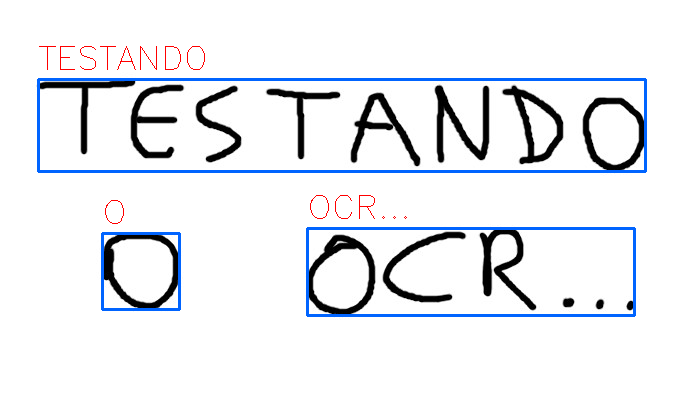

In [35]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])

  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)

    texto = resultado['text'][i]
    cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
cv2_imshow(img_copia)

### Teste 05

In [38]:
img = cv2.imread('teste02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [39]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 4, 5, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1],
 'left': [0, 111, 111, 182, 182, 111, 111, 380, 437, 130, 130],
 'top': [0, 84, 84, 84, 84, 165, 167, 179, 165, 247, 247],
 'width': [700, 481, 481, 341, 341, 481, 237, 30, 155, 440, 440],
 'height': [400, 222, 222, 62, 62, 50, 48, 36, 50, 59, 59],
 'conf': [-1, -1, -1, -1, 91, -1, 88, 93, 91, -1, 91],
 'text': ['',
  '',
  '',
  '',
  'inteligência',
  '',
  'artificial',
  'e',
  'visão',
  '',
  'computacional']}

In [40]:
def escreve_texto(texto, x, y, img, fonte, tamanho_texto=32):
  fonte = ImageFont.truetype(fonte, tamanho_texto)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - tamanho_texto), texto, font = fonte)
  img = np.array(img_pil)
  return img

In [41]:
fonte = '/content/calibri.ttf'

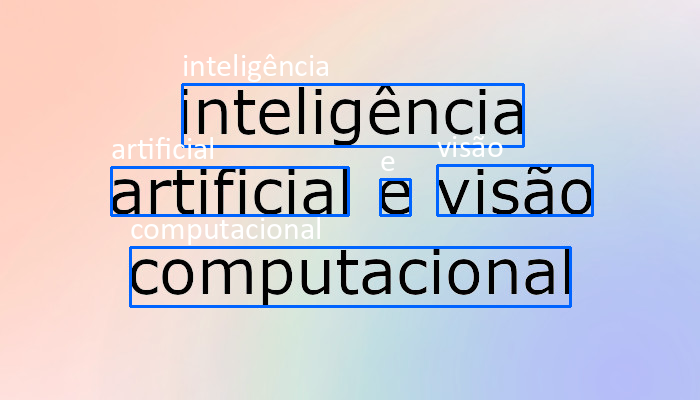

In [42]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    x, y, img = caixa_texto(resultado, img_copia)
    texto = resultado['text'][i]
    #cv2.putText(img_copia, texto, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
    img_copia = escreve_texto(texto, x, y, img_copia, fonte)
cv2_imshow(img_copia)

## Busca de informações na imagem

### Teste 06

Objetivo: obter datas

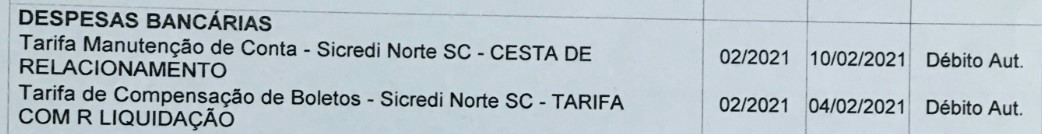

In [44]:
img = cv2.imread("tabela_teste.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [45]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="por", output_type=Output.DICT)

In [50]:
padrao_data = r'^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

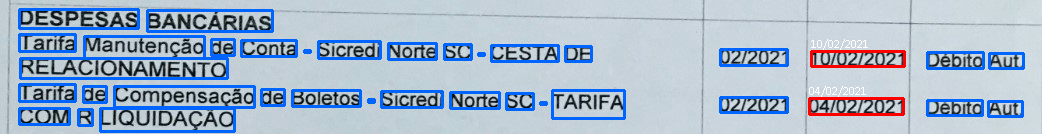

In [49]:
datas = []
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if re.match(padrao_data, texto):
      x, y, img = caixa_texto(resultado, img_copia, (0,0,255))
      img_copia = escreve_texto(texto, x, y, img_copia, fonte, 12)
      datas.append(texto)
    else:
      x, y, img_copia = caixa_texto(resultado, img_copia)
cv2_imshow(img_copia)

In [51]:
datas

['10/02/2021', '04/02/2021']

## Detecção de texto em cenários naturais

### Teste 07

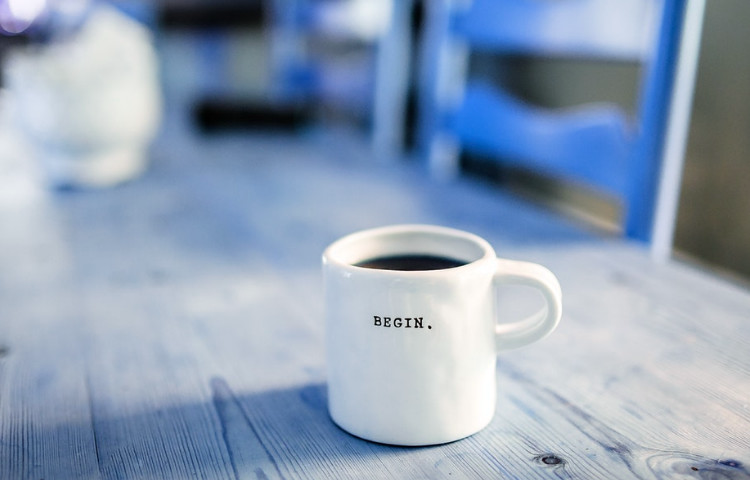

In [52]:
img = cv2.imread("caneca.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [53]:
config_tesseract = "--tessdata-dir tessdata --psm 11"
resultado = pytesseract.image_to_data(rgb, config=config_tesseract, lang="eng", output_type=Output.DICT)

In [55]:
resultado['text']

['',
 '',
 '',
 '',
 'T',
 '',
 '',
 '',
 'BEGIN.',
 '',
 '',
 '',
 'i',
 '',
 '',
 '',
 '|',
 '—-—']

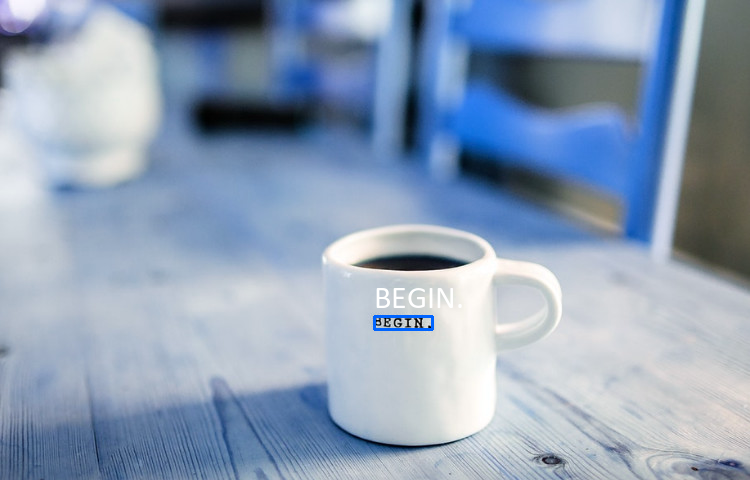

In [56]:
img_copia = rgb.copy()
for i in range(0, len(resultado['text'])):
  confianca = int(resultado['conf'][i])
  if confianca > min_conf:
    texto = resultado['text'][i]
    if not texto.isspace() and len(texto) > 0:
      x, y, img = caixa_texto(resultado, img_copia)
      img_copia = escreve_texto(texto, x, y, img_copia, fonte)
cv2_imshow(img_copia)